# tentamen Netwerkanalyse (5072DASC6Y)
**Bachelor Informatiekunde**

## Tentameninformatie
**Datum:** 2023
**Tijd:** 2 uur  (+30 minuten extra tijd)


**Toegestane hulpmiddelen:** Kladpapier, spiekbrief

## Huishoudelijke mededelingen
* Je mag tot uiterlijk 30 minuten na de begintijd starten.
* Jouw telefoon, jas en tas liggen in de kluisjes buiten de tentamenzaal.
* De eerste 30 minuten en de laatste 15 minuten mag je de zaal niet verlaten. Daarbuiten kan je als je het tentamen af  en ingeleverd hebt de zaal verlaten.
* De ondersteuning voorin de zaal kan controleren of jouw tentamen correct is ingeleverd.
* Plaats jouw collegekaart of een geldig legitimatiebewijs op de hoek van de tafel. Een surveillant komt langs om deze te controleren.
* Toiletbezoek is alleen mogelijk met toestemming van een surveillant.

## Notebook made by

__Namen__:Anoniem
__Emails__:Anoniem
__Student id__:Anoniem

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Copieer ook geen cellen. Dit levert problemen op bij nakijken. Je mag wel cellen toevoegen (als kladblaadje).
* Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

# Tentamen netwerkanalyse Toets 2 Instructie

* Het tentamen bestaat uit 5 vragen. Bij elke vraag is het aantal punten  aangegeven. Er zijn 13.5 plus 1 bonuspunt te verdienen.
* Niet alle vragen zijn even moeilijk. Lees dus eerst het tentamen door en bekijk welke vragen je liggen en maak die als eerste. 
* Er zijn steeds `assert` tests die je helpen om te zorgen dat je antwoord van de juiste vorm is (een lijst of een set of een integer, etc). 

## Tips

* Voor veel vragen hoef je echt niet te programmeren. Je kan het vaak makkelijk zelf op je kladbllaadje uitrekenen, met tellen, optellen en vermenigvuldigen. 
* Eerst even rustig de tijd nemen om de vraag te begrijpen, een plaatje tekenen van een klein netwerkje, wat proberen is vaak veel zinvolller dan meteen beginnen te programmeren.
* Gebruik de manual van Netwerkx. Je vindt er heel veel informatie over de begrippen die in de vragen voorkomen. Meestal ook de definitie (= dus wat een begrip betekent).

In [1]:
# Run this cell first
import random
import inspect
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
from nose.tools import assert_almost_equal, assert_equal
from itertools import product
from collections import Counter
import matplotlib.pyplot as plt
from itertools import count

%matplotlib inline

# 1 Logica (6pt)

* We werken op modellen met 2 eigenschappen, Man en Vrouw, en 1 symmetrische relatie HoudenVan (in formules geven we dat aan met R).
* We gaan een aantal zinnetjes vertalen naar predicaatlogica, 
    * en ze daarna programmeren, en checken of ze waar zijn op een gegeven model.
* Elke zin levert een halve punt voor de vertaling en een halve punt voor het programma op

**Let op** Hard coden heeft geen zin, wij checken je programmas op een ander model dan jij hier hebt.

### De  zinnen

**Let op. Het hoeft helemaal niet dat deze zinnen waar zijn in het gegeven model.** Jouw vertalingen zijn correct *voor elk model* (met een Man, Vrouw en een R).

0. Er is een vrouw en er is een man. (functie `z0`)
1. Er is een man die alleen van zichzelf houdt. (functie `z1`)
2. Er is een man die alleen van vrouwen houdt (Let op:  wat gebeurt er als ie van niemand houdt?) (functie `z2`)
3. Alle vrouwen houden alleen van vrouwen. (functie `z3`)
4. Er is een vrouw die van een man houdt die van een andere vrouw houdt. (functie `z4`)
    * Teken ook het plaatje/netwerkje wat hierbij hoort erbij. Gewoon met streepjes als `Vx----My` etc
    * echt het helpt je.
5. Niemand is Man en Vrouw   tegelijk. (functie `z5`)

### Hints

* `\exists x` wordt $\exists x$, net als `\forall x` wordt $\forall x$
* `\rightarrow, \neg, \wedge, \vee` worden $\rightarrow, \neg, \wedge, \vee$
* In de Python functies `z0...z5` met als argument een netwerk `G` geef je een stukje code met daarin het netwerk `G`  **dat waar teruggeeft op netwerk `G` precies als de zin waar is op het netwerk `G`**. 
* Jouw code moet correct werken **voor elk ongericht netwerk `G` met de attributen `M` en `V`**, en waarbij de lijnen als `R` gezien worden. We testen je code ook op  andere  netwerken.

### Afkortingen

* In de formules gebruik je $M(x)$ en $V(x)$ voor "x is een Man" en "x is een Vrouw" en $R(x,y)$ voor " x houdt van y". (de haakjes hoeven in de formules niet, in Python natuurlijk altijd wel)
* Ook in je Python code kan je deze afkortingen gebruiken, want we hebben die gedefinieerd op het netwerk `G`.
* Je kwantificeerd altijd over de elementen in het netwerk `G`.

### Voorbeeld

* Er is een man die van een vrouw houdt.
* $\exists x (Mx \wedge \exists y(Rxy \wedge Vy))$ 

<pre>
def z(G):
     return any(M(x) and any(R(x,y) and V(y) for y in G)  
                for x in G)
</pre>

1. \exists x \exists y (Vx \vee My )
2. \exists x \exists y (Mx \wedge My \rightarrow Rxx)
3. \exists x \forall y (Mx \wedge (Vy \rightarrow Rxy)
4. \forall x \forall y ((Vx \wedge Vy) \rightarrow Rxy)
5. \exists x \exists y \exists z (Vx \wedge My \wedge Vz \wedge Rxy \wedge Ryz)
6. \forall x (\vee(Vx \wedge Mx)

Mannen: {0, 32, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30}
Vrouwen: {1, 33, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31}


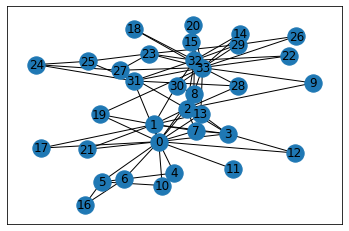

In [2]:
G=nx.karate_club_graph()
for x in G:
    if x%2==0:
        G.nodes[x]['M']=True
        G.nodes[x]['V']=False
    else:
        G.nodes[x]['M']=False
        G.nodes[x]['V']=True
nx.draw_networkx(G) 

print('Mannen:',  {x for x in G if G.nodes[x]['M']})
print('Vrouwen:',  {x for x in G if G.nodes[x]['V']})

In [3]:
# definities  om te gebruiken in je Python code

def M(x):
    '''x is een Man in netwerk G'''
    return G.nodes[x]['M']

def V(x):
    '''x is een Vrouw in netwerk G'''
    return G.nodes[x]['V']

def R(x,y):
    '''there is an edge from x to y in G'''
    return G.has_edge(x,y)

In [4]:
#voorbeeld

{x for x in G if M(x)}  # alle mannen


{0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32}

In [5]:
# Er is een vrouw en er is een man
def z0(G):
    return any(V(x) for x in G)and any(M(y) for y in G)
    

z0(G)

True

In [6]:
#Er is een vrouw en er is een man
assert isinstance(z0(G),bool)


In [7]:
# Er is een man die alleen van zichzelf houdt. 
def z1(G):
    return any (M(x) and R(x,x) for x in G)
 
 
z1(G)

False

In [8]:
# Er is een man die alleen van zichzelf houdt. 
assert isinstance(z1(G),bool)


In [9]:
# Er is een man die alleen van vrouwen houdt 
def z2(G):
    return any(M(x) and not R(x,y) or V(y) for y in G for x in G)
 

 
z2(G)

True

In [10]:
# Er is een man die alleen van vrouwen houdt  
assert isinstance(z2(G),bool)


In [22]:
# Alle vrouwen houden alleen van vrouwen. 
def z3(G):

    return all (all(V(y) for y in G if R(x,y)) for x in G if V(x))
 
 
z3(G)

False

In [ ]:
# Alle vrouwen houden alleen van vrouwen.  
assert isinstance(z3(G),bool)


In [18]:
# Er is een vrouw die van een man houdt die van een andere vrouw houdt.
def z4(G):
    return any (V(x) and R(x,y) and M(x) and R(x,z) and V(z) for z in G for y in G for x in G)
 
 
z4(G)

False

In [ ]:
# Er is een vrouw die van een man houdt die van een andere vrouw houdt.
assert isinstance(z4(G),bool)


In [28]:
# Niemand is Man en Vrouw   tegelijk.
def z5(G):
    return (all (M(x) or V(x) and not M(x) and V(x) for x in G))
 
 
z5(G)

True

In [ ]:
# Niemand is Man en Vrouw   tegelijk.
assert isinstance(z5(G),bool)
 

# 2 Small worlds (2pt)


Hieronder staat een  network. Het bestaat uit 16 knopen en elke knoop is verbonden met precies 6 knopen.  

1. Wat is de gemiddelde clustering coeffient in dit netwerk? (variabele `avg_clustering_coeffient`)
2. Wat is de   _average (shortest) path length_ in dit netwerk? Gevraagd wordt dus naar de gemiddelde **afstand** tussen 2 knopen. `average_path_length`

* **Hint** Je kan en mag dit met de hand uitrekenen. Je hoeft het netwerk dus niet zelf te maken.
* **Hint2** Je kunt natuurlijk wel networkx gebruiken om je antwoord te checken.

![](ws.png)

In [ ]:
avg_clustering_coeffient = 0.5999999999999999 
average_path_length = 1.8  


avg_clustering_coeffient, average_path_length

In [ ]:
assert_equal(type(avg_clustering_coeffient), float)
assert 0<= avg_clustering_coeffient<=1

In [ ]:
assert_equal(type(average_path_length), float)
assert 1<= average_path_length <= 15


# 2.2 Small worlds part 2 (1.5pt)


 

Stel nou dat we in het vorige netwerk lijn (5,4) vervangen door (5,12) en niets meer. 

1. Voor hoeveel van de 16 knopen is de clustering coefficient toegenomen? (antwoord in `cc_toename`)
2. Wat is de *closeness centrality* van knoop 5  in dit netwerk? (antwoord in `closeness_5`)
    * **Let op** In tegenstelling tot het boek gebruiken we hier de genormaliseerde closeness centrality. Je vermenigvuldigt dan de closeness centrality uit het boek met het aantal knopen min 1. Zie ook `nx.closeness_centrality?` voor de definitie.
3. Wat **was** de *closeness centrality* van knoop 5  in het oorspronkelijke reguliere netwerk? (antwoord in `closeness_5_original_network`)
* **Hint** In de uitleg die je krijgt na `nx.closeness_centrality?` staat ook een stukje Latex code beginnend met `C(u) = \frac{`.... Dat leest niet zo lekker. Maar als je het tussen dollars in een markdown cell zet, dan zie je opeens een heldere formule ontstaan.
* **Hint** Ook hier hoef je niks te programmeren. We kijken het antwoord na voor dit specifieke netwerk.

![](ws2.png)



In [ ]:
# hint
#nx.closeness_centrality?

# markdown cell waar je lekker wat in kunt rommelen


In [ ]:
cc_toename = 0
closeness_5 = None  # replace with your answer
closeness_5_original_network = None # replace with your answer
#WRITE YOUR CODE HERE
#WRITE YOUR CODE HERE

cc_toename, closeness_5, closeness_5_original_network

In [ ]:
assert_equal(type(cc_toename), int)
assert 0 <= cc_toename <= 16

In [ ]:
assert_equal(type(closeness_5), float)
assert 0 <= closeness_5 <= 1

In [ ]:
assert_equal(type(closeness_5_original_network), float)
assert 0 <= closeness_5_original_network <= 1

# 3 Average degree (1pt)

Definieer de functie `avg_degree(N,L)` die de gemiddelde degree teruggeeft voor een ongericht netwerk met N knopen en L edges.

Je kan ervan uitgaan dat L kleiner dan of gelijk is aan het maximaal mogelijke aantal lijnen met N knopen. 

**Hint** Als je het niet meer weet, of de formule iet op je spiekbrief hebt staan, maak dan wat kleine netwerkjes, bereken L en N, en de avg degree en zie het patroon.

In [ ]:
def avg_degree(N,L):
    d = (2 * L)  / N * (N - 1)
    return d * (N - 1)
    
avg_degree(20,80), avg_degree(3,3)    

In [ ]:
assert isinstance(avg_degree(3,3),float)


# 4 Betweenness centrality

Stel we hebben een verbonden netwerk bestaande uit drie clusters en een middelpunt waardoor die drie verbonden zijn, zoals in het plaatje hieronder.  Die drie clusters bevatten respectivelijk `c1, c2` en `c3` veel knopen.

 

![](bc_cluster.jpg)

Wat is nou de betweenness centrality van die middelste knoop? Je geeft je antwoord als de functie `bc_middelknoop(c1,c2,c3)` waarbij die `c`'s steeds het aantal knopen zijn in die 3 clusters.

Hier is de definitie ($s$ en $t$ zijn ongelijk en zijn variabelen over alle knopen in het netwerk)
![](bc.png)


### Hint 

Met clusters van grootte 1,2 en 3 is het antwoord 22.

In [ ]:
def bc_middelknoop(c1,c2,c3):
#WRITE YOUR CODE HERE

bc_middelknoop(3,4,5), bc_middelknoop(1,2,3)

In [ ]:
assert isinstance(bc_middelknoop(1,2,3),float) or isinstance(bc_middelknoop(1,2,3),int)



# 5 Friend-foe networks (2 pt. + 1 pt bonus)
Normaal gesproken zien we relaties in netwerken als iets positiefs ("houden van", "samenwerking met", enz.). We kunnen echter ook zeggen dat sommige _edges_ positieve relaties zijn en sommige negatieve.
We werken in deze zogenaamde *friend-foe* netwerken altijd met **volledige netwerken**: elke mogelijke lijn is aanwezig en gelabeld met of een + of een -.

Zie het netwerk `X` hieronder voor een voorbeeld hoe een _friend-foe network_ eruit ziet in NetworkX.

Beantwoord over dit fenomeen de volgende vragen:


1. In welk geval noemen we zo'n netwerk structureel gebalanceerd? Antwoord in 1 grammaticaal correcte Nederlandse zin beginnend met: *Een vriend-vijand netwerk G is **niet** structureel gebalanceerd als er een ....* (1pt)
2. Driehoekjes zijn belangrijk in dit soort netwerken. Maak de functie `aantal_driehoeken(n)` die het totaal aantal   driehoekjes in een ongericht volledig netwerk met $n$ knopen teruggeeft. (1pt)
    * **Hint** Denk weer eens hoe je het maximaal aantal lijnen in een ongericht netwerk berekende.
    * Twee driehoekjes zijn hetzelfde als ze dezelfde knopen hebben. 
3. **Bonus vraag voor 1 pt** Nou dat zijn er heel wat he? Wat een gedoe zou dat zijn om die allemaal te bekijken. Gelukkig hebben we de karakteriseringstelling over gebalanceerde netwerken. Gebruik die om effe lekker snel te testen of een friend-foe netwerk `G` gebalanceerd is. Doe dit in de functie `gebalanceerd(G)` die True of False teruggeeft. (1pt)
    * De test dat `G` volledig is en alle lijnen met + en - gelabeld zijn hebben wij al gegeven. 
    * **Hints** Gebruik de karakteriseringsstelling, en denk eens aan het weglaten van bepaalde soorten lijnen.
    * Een flauw maar tricky randgeval is het netwerk met 2 knopen en daar een - lijn tussen. 
 

De relatie (1, 2) is: +


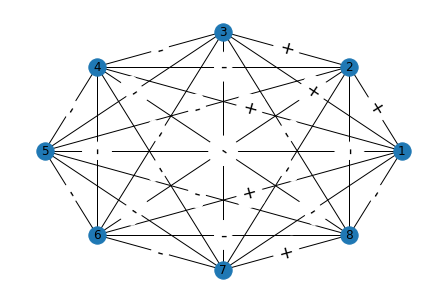

In [29]:
 
# maak een nieuw netwerkje
X = nx.Graph()
# voeg de knopen toe
Nodes=list(range(1,9))
X.add_nodes_from(Nodes)

# voeg de relaties toe
P={(1, 2), (1, 4), (2, 3), (1, 3), (1, 6), (7, 8)}
N = {(x,y) for x in Nodes for y in Nodes if x<y} -P
X.add_edges_from(P, rel='+')
X.add_edges_from(N, rel='-')



# laat het netwerkje netjes zien
pos = nx.kamada_kawai_layout(X)
nx.draw(X, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(X, 'rel')
nx.draw_networkx_edge_labels(X, pos, edge_labels=edge_labels, font_size=18)

# zo haal je het soort relatie van de edge (1, 2) op:
print("De relatie (1, 2) is:", X[1][2]["rel"])

#### Hieronder je mooie zin voor de eerste deelvraag

Een vriend-vijand netwerk G is niet structureel gebalanceerd als er een knoop is die niet alle gemeenschappelijke vijanden deelt met zijn bevriende knopen.

In [30]:
 
def aantal_driehoeken(n):
    return (n + (n - 1)* (n - 2)) / 6
    
{n:aantal_driehoeken(n) for n in list(range(1,11))+ list(range(100,1001,100))}

{1: 0.16666666666666666,
 2: 0.3333333333333333,
 3: 0.8333333333333334,
 4: 1.6666666666666667,
 5: 2.8333333333333335,
 6: 4.333333333333333,
 7: 6.166666666666667,
 8: 8.333333333333334,
 9: 10.833333333333334,
 10: 13.666666666666666,
 100: 1633.6666666666667,
 200: 6600.333333333333,
 300: 14900.333333333334,
 400: 26533.666666666668,
 500: 41500.333333333336,
 600: 59800.333333333336,
 700: 81433.66666666667,
 800: 106400.33333333333,
 900: 134700.33333333334,
 1000: 166333.66666666666}

In [ ]:
 
assert_equal(type(aantal_driehoeken(3)) in {int,float}, True)
 


In [ ]:
def gebalanceerd(G):
    assert nx.density(G)==1 or len(G.nodes) ==1, 'Graaf G is niet volledig'
     
    assert all(G.edges[edge]['rel'] in {'+','-'} for edge in G.edges), 'Niet elke lijn is met + of - gelabeld'
    # nu jouw code
    #WRITE YOUR CODE HERE
     

gebalanceerd(X)

In [ ]:
assert isinstance(gebalanceerd(X),bool)



            
 
     